## 데이터 불러오기

In [ ]:
'''
CoolTerm 프로그램을 사용하는 경우, 몇 가지 문제점이 있다.
첫번째, 아두이노의 실행 시작과, 텍스트 파일 저장 시작 시점이 동일하지 않다. 아두이노 실행 시작은 run으로, 텍스트 파일로의 저장은 Start 버튼을
눌러 수동으로 시작해줘야 하기 때문이다.

'''

In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\lab\Desktop\WINTER\변환 데이터\CoolTerm Capture 2022-01-04 16-48-27.txt",skiprows=4)
data

,Voltage,pH
0,0.00,0.51
1,0.05,0.68
2,0.10,0.85
3,0.15,1.02
4,0.19,1.19
...,...,...
545,1.73,6.57
546,1.72,6.53
547,1.71,6.49
548,1.70,6.45


In [ ]:
'''
df = pd.get_dummies(df)
'''

## Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv(r"C:\Users\lab\Desktop\WINTER\변환 데이터\CoolTerm Capture 2021-12-27 17-12-37.txt",header=None)
df1

,0,1
0,1.23,4.64
1,1.23,4.64
2,1.23,4.64
3,1.23,4.64
4,1.23,4.64
...,...,...
1279,1.24,4.68
1280,1.24,4.68
1281,1.24,4.66
1282,1.23,4.63


In [3]:
xdata = np.array(df1[0])
ydata = np.array(df1[1])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=924)

In [5]:
reg = LinearRegression()
reg.fit(X_train.reshape(-1,1),y_train)
pred = reg.predict(X_test.reshape(-1,1))
pred

array([4.6009225 , 4.63387038, 4.6009225 , 4.6009225 , 4.63387038,
       4.63387038, 4.63387038, 4.53502675, 4.63387038, 4.63387038,
       4.56797463, 4.66681825, 4.6009225 , 4.6009225 , 4.66681825,
       4.63387038, 4.6009225 , 4.56797463, 4.56797463, 4.56797463,
       4.69976612, 4.63387038, 4.63387038, 4.6009225 , 4.6009225 ,
       4.69976612, 4.66681825, 4.6009225 , 4.63387038, 4.6009225 ,
       4.56797463, 4.63387038, 4.56797463, 4.732714  , 4.56797463,
       4.63387038, 4.6009225 , 4.63387038, 4.6009225 , 4.66681825,
       4.63387038, 4.6009225 , 4.53502675, 4.56797463, 4.6009225 ,
       4.56797463, 4.69976612, 4.6009225 , 4.6009225 , 4.56797463,
       4.63387038, 4.56797463, 4.63387038, 4.6009225 , 4.6009225 ,
       4.56797463, 4.63387038, 4.66681825, 4.56797463, 4.63387038,
       4.6009225 , 4.6009225 , 4.6009225 , 4.53502675, 4.69976612,
       4.56797463, 4.63387038, 4.56797463, 4.6009225 , 4.53502675,
       4.6009225 , 4.63387038, 4.6009225 , 4.6009225 , 4.56797

In [6]:
mean_squared_error(y_test,pred)

0.00010893290870350916

In [7]:
r2_score(y_test,pred)

0.9440694972833888

## Logistic Regression (분류)

#### 종속변수가 이항형일 때만 사용가능하다는 단점이 있음

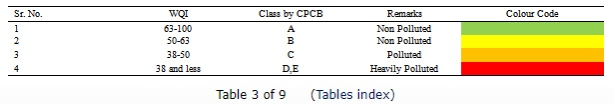

In [4]:
# 위의 참조한 Table 기준을 참조하여 A,B는 non-polluted, C,D는 polluted로 class를 분류하여 로지스틱 회귀분석을 실시한다.

total_df = pd.read_excel(r"C:\Users\lab\Desktop\WINTER\total_df.xlsx")

total_df['Remarks'] = ''
for n in range(len(total_df)):
    if total_df.loc[n,'class_WQI'] == 'A':
        total_df.loc[n,'Remarks'] = 'Non-Polluted'
    elif total_df.loc[n,'class_WQI'] == 'B':
        total_df.loc[n,'Remarks'] = 'Non-Polluted'
    elif total_df.loc[n,'class_WQI'] == 'C':
        total_df.loc[n,'Remarks'] = 'Polluted'
    else:
        total_df.loc[n,'Remarks'] = 'Polluted'
total_df

,측정소명,년/월,수온(℃),용존산소(㎎/L),BOD(㎎/L),수소이온농도,분원성대장균군수,Do(100 %saturation),DO(% saturation),Do_index,FC_index,pH_index,BOD_index,WQI(수질평가지수),class_WQI,Remarks
0,안양천5,1997-01-20,5.0,6.6,23.8,8.0,80000,12.37,53.354891,48.875222,2.000000,78.160,9.626,39.533839,C,Polluted
1,안양천5,1997-02-12,5.0,5.5,21.3,8.1,130000,12.37,44.462409,38.471019,2.000000,75.175,12.701,36.149236,D,Polluted
2,안양천5,1997-03-17,10.0,3.0,16.5,7.7,1600000,10.92,27.472527,18.311868,2.000000,87.115,18.605,34.541979,D,Polluted
3,안양천5,1997-04-15,18.0,2.0,16.8,7.7,1700000,9.18,21.786492,14.559085,2.000000,87.115,18.236,33.297436,D,Polluted
4,안양천5,1997-05-12,19.0,1.2,14.1,7.7,500000,9.01,13.318535,8.970233,2.000000,87.115,21.557,32.295512,D,Polluted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,탄천5,2021-01-12,6.7,13.0,3.2,6.8,6600,11.75,110.638298,94.744255,-25.829893,85.433,74.270,64.723679,A,Non-Polluted
866,탄천5,2021-02-04,7.5,10.6,4.1,6.8,12000,11.47,92.414996,94.575545,2.000000,85.433,67.970,68.573059,A,Non-Polluted
867,탄천5,2021-03-04,9.9,9.7,4.1,7.2,32000,10.92,88.827839,90.378571,2.000000,98.833,67.970,71.023997,A,Non-Polluted
868,탄천5,2021-04-01,16.4,9.0,2.2,7.0,8600,9.56,94.142259,96.596444,-27.881260,92.133,81.270,68.324098,A,Non-Polluted


In [5]:
# 데이터프레임에 범주형 변수가 있으면 모두 dummy coding을 진행하기 때문에 Remarks를 제외한 범주형 변수열을 모두 삭제시켜주고 진행한다.

total_df_copy = total_df.copy()
total_df_copy = total_df_copy.drop(['측정소명','class_WQI'],axis=1)
dummy = pd.get_dummies(total_df_copy[(total_df_copy['Remarks'] == 'Polluted') | (total_df_copy['Remarks'] == 'Non-Polluted')])
dummy

,년/월,수온(℃),용존산소(㎎/L),BOD(㎎/L),수소이온농도,분원성대장균군수,Do(100 %saturation),DO(% saturation),Do_index,FC_index,pH_index,BOD_index,WQI(수질평가지수),Remarks_Non-Polluted,Remarks_Polluted
0,1997-01-20,5.0,6.6,23.8,8.0,80000,12.37,53.354891,48.875222,2.000000,78.160,9.626,39.533839,0,1
1,1997-02-12,5.0,5.5,21.3,8.1,130000,12.37,44.462409,38.471019,2.000000,75.175,12.701,36.149236,0,1
2,1997-03-17,10.0,3.0,16.5,7.7,1600000,10.92,27.472527,18.311868,2.000000,87.115,18.605,34.541979,0,1
3,1997-04-15,18.0,2.0,16.8,7.7,1700000,9.18,21.786492,14.559085,2.000000,87.115,18.236,33.297436,0,1
4,1997-05-12,19.0,1.2,14.1,7.7,500000,9.01,13.318535,8.970233,2.000000,87.115,21.557,32.295512,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2021-01-12,6.7,13.0,3.2,6.8,6600,11.75,110.638298,94.744255,-25.829893,85.433,74.270,64.723679,1,0
866,2021-02-04,7.5,10.6,4.1,6.8,12000,11.47,92.414996,94.575545,2.000000,85.433,67.970,68.573059,1,0
867,2021-03-04,9.9,9.7,4.1,7.2,32000,10.92,88.827839,90.378571,2.000000,98.833,67.970,71.023997,1,0
868,2021-04-01,16.4,9.0,2.2,7.0,8600,9.56,94.142259,96.596444,-27.881260,92.133,81.270,68.324098,1,0


In [6]:
# 독립변수는 WQI(수질평가지수), 종속변수(예측변수)를 Remarks_Polluted로 두고, test_size는 0.3으로 하여 로지스틱 회귀분석을 진행한다.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = dummy.iloc[:,12].values.reshape(-1,1)
y = dummy.iloc[:,14].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=924)
print(len(X_train),len(X_test))

lreg = LogisticRegression()
lreg.fit(X_train, y_train)
ypred = lreg.predict(X_test)
print(y_test)

609 261
[1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0]


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test,ypred))
print(f"accuracy score는 {round(accuracy_score(y_test,ypred),4)}")

[[195   1]
 [  0  65]]
accuracy score는 0.9962


In [10]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [11]:
breast_x = breast.data
breast_y = breast.target

print(breast_x.shape)
print(breast_y.shape)

(569, 30)
(569,)


In [12]:
model = LogisticRegression()
model.fit(X=breast_x, y=breast_y)

C:\Users\lab\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
print(model.coef)
print(model.intercept)

AttributeError: 'LogisticRegression' object has no attribute 'coef'

## Random Forest

#### 필요한 module import

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#### data 불러오기

In [70]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#### X를 예측에 이용할 정보, y를 예측할 타겟변수로 하여 나누기

In [71]:
X = iris.data
y = iris.target

#### 학습 데이터(train set)와 테스트 데이터(test set)로 나누기

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 924)

#### parameter 설정하여 모델 만들고 학습데이터 적합시킨 후, test data로 예측하기

In [34]:
rf = RandomForestClassifier(n_estimators = 10, n_jobs = -1, random_state = 924)
rf.fit(X,y)
y_pred = rf.predict(X_test)

In [35]:
y_pred

array([0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0,
       0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', n_estimator=25, random_state=924, n_jobs=-1)
rf.fit(X_train,y_train)

plot_decision_regions(X_combined,)

#### accuracy_score로 정확도 확인

In [37]:
accuracy_score(y_test,y_pred)

0.9777777777777777

#### confusion matrix로 잘못 분류된 부분 찾기

In [36]:
confusion_matrix(y_test,y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

### 추가로 작성할 부분

In [129]:
len(X_test)

45

<ipython-input-116-6121f477a4f0>:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0,


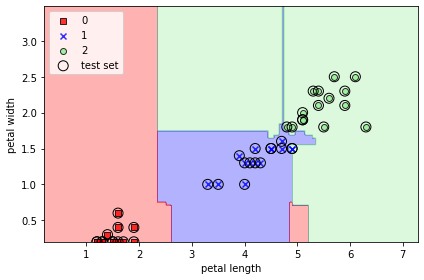

In [130]:
rf = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=924, n_jobs=-1)
rf.fit(X_train, y_train)
sv_plot_clf(X_test, y_test, classifier=rf, test_idx=range(45))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

#### feature scaling

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

#### 최적의 hyper parameter 설정

In [ ]:
confusion_matrix(y_test,y_pred)#### feature scaling#### feature scaling#### feature scaling#### confusion matrix로 잘 분류되었는지 확인'''
criterion >> 모델 성능 평가할 때 사용할 방법
n_estimator >> 의사결정 트리수
n_jobs >> 모델 돌릴 때 사용하는 CPU 코어 갯수. 이보다 클수록 더 성능이 향상됨

'''

In [ ]:
'''
랜덤 포레스트 hyper parameter 총 7가지

1. max_depth
root node부터 leaf node까지의 최대 거리를 의미한다. 즉, 랜덤 포레스트의 깊이가 어느 정도인지 나타냄.
값이 클수록 train set에는 적합이 잘 되지만, 어느 순간부터 overfitting으로 인해 test set에 대한 예측 성능은 떨어진다.

2. min_sample_split
노드를 분할하는 데에 필요한 최소 샘플 종류 수

3. Max terminal node(Max leaf node)
tree가 가질 수 있는 최대 leaf node 수. 마찬가지로 값이 크면 너무 세세하게 분할되어 overfitting이 발생한다.

4. min samples leaf
node 안에 남아있어야 할 최소 샘플 갯수
값이 너무 작으면 overfitting, 반대로 너무 크면 underfitting(너무 안 나뉘어지므로)

5. n_estimator
size of trees. 크다고 overfitting 등이 문제가 발생하는 건 아니지만, time complexity가 커지면서 연산에 시간이 오래 걸린다.

6. max samples


'''

In [26]:
'''
Do a grid search to find optimal hyper-parameters of the random forest classifier.
We use the area under the ROC curve to score parameter choices.

(This cell can be omitted if the previous one was run.)
'''
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Specify the parameter grid to be searched
parameter_grid = [{'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 
                   'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20]}]

# Start the grid search
clf = GridSearchCV(RandomForestClassifier(criterion="gini", min_samples_split=2, min_weight_fraction_leaf=0.0,
                                          max_features="auto", max_leaf_nodes=None, bootstrap=True,
                                          oob_score=True, verbose=0, warm_start=False, random_state=0,
                                          n_jobs=-1, class_weight="balanced_subsample"), 
                   parameter_grid, refit=True, cv=3, scoring='roc_auc')
%time clf.fit(X_train, y_train)
'''
# Print out the results
print("Best parameter values found on development set:")
print(" ")
print(clf.best_params)
print(" ")
print("Grid scores on development set:")
print(" ")
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" %(mean_score, scores.std()*2, params))

# Retrieve best random forest model from grid search
rf2 = clf.best_estimator_
print("\nBest estimator:\n%s" %rf2)
'''

C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Detail

C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Detail

C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Detail

C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\lab\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


KeyboardInterrupt: 

## Support Vector Machine

#### 필요한 module import

In [131]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### 사용할 iris 데이터 가져온 후 train, test data로 나누기

In [132]:
iris = load_iris()

X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 924)

In [83]:
svm_clf = Pipeline([("scaler", StandardScaler()), ("linear_svc",LinearSVC(C=1,loss='hinge'))])

In [84]:
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [85]:
y_pred = svm_clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0,
       0])

In [86]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [87]:
confusion_matrix(y_test, y_pred)

array([[18,  1,  0],
       [ 0, 12,  1],
       [ 0,  1, 12]], dtype=int64)

In [88]:
y_pred_poly = poly_svm_clf(X_test)
y_pred_poly

TypeError: 'Pipeline' object is not callable

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 924)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [90]:
import numpy as np
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', random_state=924, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=0.2, random_state=924)

### 최적의 hyper-parameter 찾기

In [91]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf','sigmoid','linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 5)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, 

[CV 1/5] END ...............C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...............C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ...............C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...............C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...............C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=3)

In [92]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [93]:
model = grid.best_estimator_

In [94]:
y_pred = model.predict(X_test)

In [95]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9777777777777777
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


### visualization

#### 두 개의 예측변수를 이용하여 하나의 타겟변수를 예측할 때 시각화 할 수 있다.

In [107]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=924, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm = SVC(kernel = 'linear', random_state=924, gamma=1.0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=1.0, kernel='linear', random_state=924)

In [120]:
svm.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [116]:
def sv_plot_clf(X, y, classifier, test_idx = None, resolution = 0.02):
    from matplotlib.colors import ListedColormap
    import matplotlib.pyplot as plt
    
    marker = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,0].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], 
                    alpha=0.8, c=colors[idx], marker=marker[idx], label=cl, edgecolors='black')
    
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0, 
                    linewidth=1, marker='o', s=100, label='test set')

<ipython-input-116-6121f477a4f0>:24: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0,


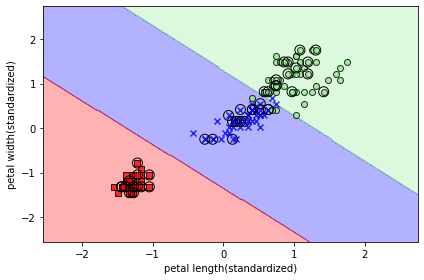

In [117]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
sv_plot_clf(X=X_combined_std,y=y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.tight_layout()
plt.show()

In [105]:
X_test

array([[1.4, 0.2],
       [1.7, 0.3],
       [4. , 1.2],
       [1.4, 0.3],
       [5.4, 2.3],
       [6.9, 2.3],
       [4.5, 1.5],
       [1.3, 0.3],
       [4.4, 1.2],
       [4.8, 1.4],
       [5.6, 2.4],
       [1.5, 0.2],
       [5. , 1.9],
       [4.6, 1.5],
       [1.6, 0.2],
       [1.2, 0.2],
       [1.1, 0.1],
       [3.7, 1. ],
       [5.8, 1.8],
       [6.6, 2.1],
       [1.5, 0.2],
       [6.4, 2. ],
       [1.2, 0.2],
       [1.7, 0.4],
       [5.1, 1.6],
       [1.5, 0.4],
       [1.3, 0.3],
       [1.4, 0.2],
       [5.1, 1.8],
       [4.7, 1.4],
       [4.5, 1.7],
       [4.1, 1. ],
       [5. , 2. ],
       [1.5, 0.3],
       [6.1, 1.9],
       [4.1, 1.3],
       [5.6, 2.4],
       [4.7, 1.2],
       [1.9, 0.2],
       [4.8, 1.8],
       [1.6, 0.2],
       [4.5, 1.3],
       [3.9, 1.1],
       [1.5, 0.2],
       [1.6, 0.2]])